# Import Library

In [326]:
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import pandas as pd
import numpy as np
import cv2
import base64
from PIL import Image
from sklearn.model_selection import train_test_split
import os
import imghdr
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import albumentations as A
from albumentations.pytorch import ToTensorV2
import torchvision
from sklearn.utils import resample
from sklearn.utils import shuffle
from collections import defaultdict
from sklearn import metrics
from sklearn.metrics import confusion_matrix


# Load Folder

In [262]:
# DataPath = '/Users/taingmolika/Desktop/CADT/FML/Project/lfw_funneled'

In [263]:
# dataset = []
# for path in glob.iglob(os.path.join(DataPath, "**", "*.jpg")):
#     person = path.split("/")[-2]
#     dataset.append({"person":person, "path": path})
    
# dataset = pd.DataFrame(dataset)
# dataset.head(10)

In [264]:
def load_images(data_path):
    images = []
    labels = []
    for person_name in os.listdir(data_path):
        person_dir = os.path.join(data_path, person_name)
        if os.path.isdir(person_dir):
            for image_filename in os.listdir(person_dir):
                if image_filename.endswith('.jpg'):
                    image_path = os.path.join(person_dir, image_filename)
                    image = cv2.imread(image_path)
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    images.append(image)
                    labels.append(person_name)
    images = np.array(images)
    labels = np.array(labels)
    unique_labels = np.unique(labels)

    return {
    'data': images,
    'target': labels,
    'target_names': unique_labels
    }
dataset = load_images('./Data/')

In [265]:
dataset

{'data': array([[[[214, 197, 181],
          [209, 192, 176],
          [203, 184, 167],
          ...,
          [188, 114,  67],
          [175, 101,  56],
          [168,  94,  49]],
 
         [[214, 197, 181],
          [208, 191, 175],
          [203, 184, 167],
          ...,
          [188, 114,  67],
          [174, 100,  55],
          [167,  93,  48]],
 
         [[212, 195, 179],
          [207, 190, 174],
          [201, 184, 166],
          ...,
          [187, 113,  66],
          [175,  98,  54],
          [168,  91,  47]],
 
         ...,
 
         [[ 55,  46,  49],
          [ 57,  48,  51],
          [ 61,  52,  55],
          ...,
          [120,  57,  22],
          [121,  58,  25],
          [122,  59,  26]],
 
         [[ 51,  42,  47],
          [ 54,  45,  50],
          [ 56,  47,  52],
          ...,
          [120,  57,  22],
          [119,  56,  23],
          [120,  57,  24]],
 
         [[ 48,  39,  44],
          [ 50,  41,  46],
          [ 53,  44,  

In [266]:
target_counts = Counter(dataset['target'])

targets_to_drop = [target for target, count in target_counts.items() if count < 20]

# Filter the data and targets based on the targets to drop
filtered_data = []
filtered_targets = []

for data, target in zip(dataset['data'], dataset['target']):
    if target not in targets_to_drop:
        filtered_data.append(data)
        filtered_targets.append(target)

dataset['data'] = np.array(filtered_data)
dataset['target'] = np.array(filtered_targets)
dataset['target_names'] = np.unique(dataset['target'])

In [267]:
print(dataset['data'].shape)
print(dataset['target'].shape)
print(dataset['target_names'].shape)

(3023, 250, 250, 3)
(3023,)
(62,)


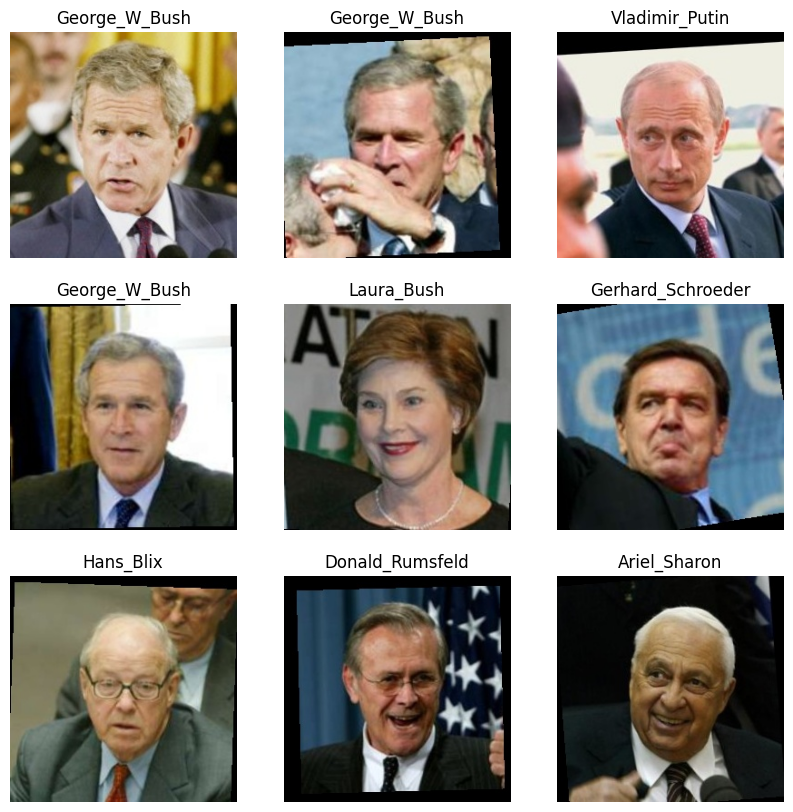

In [268]:
# Function to display a random set of images
def display_random_images(images, labels, rows, cols, cmap=None):
    fig = plt.figure(figsize=(10, 10))
    for i in range(1, cols * rows + 1):
        index = np.random.randint(len(images))
        plt.subplot(rows, cols, i)
        plt.axis('off')
        plt.imshow(images[index], cmap=cmap)
        plt.title(labels[index])
    plt.show()
display_random_images(dataset['data'], dataset['target'], 3, 3)

# Data Visualization

In [269]:
# dataset.shape

In [270]:
# dataset.info()

In [271]:
# dataset.describe(include='all')

In [272]:
# dataset['person'].count()

In [273]:
# image_types = {}

# for root, dirs, files in os.walk(DataPath):
#     for file in files:
#         file_path = os.path.join(root, file)
#         if os.path.isfile(file_path):  # Check if it's a file (not a directory)
#             image_type = imghdr.what(file_path)  # Get the image type
#             if image_type is not None:
#                 if image_type not in image_types:
#                     image_types[image_type] = 1
#                 else:
#                     image_types[image_type] += 1

# # Plotting the image types for each subfolder
# labels = list(image_types.keys())
# counts = list(image_types.values())

# plt.figure(figsize=(10, 6))
# plt.bar(labels, counts)
# plt.xlabel('Image Type')
# plt.ylabel('Count')
# plt.title('Overall Image Type Counts')
# plt.show()

In [274]:
# dataset.groupby("person").count()[:50].plot(kind='bar', figsize=(20,5))

In [275]:
# import matplotlib.pyplot as plt

# counts = dataset.groupby("person").size().sort_values(ascending=False)[:100]
# counts.plot(kind='bar', figsize=(20, 5))

# plt.xlabel('Person')
# plt.ylabel('Count')
# plt.title('Top 50 Persons in the Dataset (Sorted by Count - Ascending)')
# plt.xticks(rotation=90)
# plt.show()

In [276]:
# image_count = dataset['person'].value_counts()

# image = image_count[image_count > 10]

# print(image)

In [277]:
# image_sizes = []

# for file in dataset['path']:
#     image = cv2.imread(file)
#     if image is not None:  # Check if the image was successfully loaded
#         size = image.shape[:2]  # Get the dimensions (height, width)
#         image_sizes.append(size)

# # Update the dataset DataFrame with the 'Size' column
# dataset['Size'] = image_sizes

# dataset.head(10)

In [278]:
# size_count = dataset['Size'].value_counts()
# print(size_count)

In [279]:
# dataset['path'][0]

In [280]:
# from IPython.display import display
# from PIL import Image

# for image in dataset['path'][:10]:
#     display(Image.open(image))

In [281]:
# from IPython.display import display
# from PIL import Image

# for image, name in zip(dataset['path'][:10], dataset['person'][:10]):
#     print(name)
#     img = Image.open(image)
#     display(img)
#     img.close()

In [282]:
# plt.figure(figsize=(20, 10))

# for i, path in enumerate(dataset['path'][:20]):
#     img = plt.imread(path)
#     plt.subplot(4, 5, i+1)
#     plt.imshow(img)
#     plt.title(dataset['person'].iloc[i])
#     plt.xticks([])
#     plt.yticks([])

# plt.tight_layout()
# plt.show()

In [283]:
# path = dataset['path'][0]
# pixels = pd.Series(list(plt.imread(path).flatten()))

# pixels.plot(kind='hist', bins=50, title='Distribution of Pixel Values')
# plt.show()

In [284]:
# image = plt.imread(path)
# pixels = image.flatten()

In [285]:
# # Display RGB Channels of our image
# image = plt.imread(path)

# fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# axs[0].imshow(image[:, :, 0], cmap='Reds')
# axs[1].imshow(image[:, :, 1], cmap='Greens')
# axs[2].imshow(image[:, :, 2], cmap='Blues')

# axs[0].axis('off')
# axs[1].axis('off')
# axs[2].axis('off')

# axs[0].set_title('Red channel')
# axs[1].set_title('Green channel')
# axs[2].set_title('Blue channel')

# plt.show()

In [286]:
# image = plt.imread(dataset['path'][0])

# # Convert the image to grayscale if it's in color
# if len(image.shape) > 2:
#     image = np.mean(image, axis=2)

# # Flatten the image to a 1D array
# pixels = image.flatten()

# # Plot the histogram
# plt.hist(pixels, bins=256, color='gray', alpha=0.7)
# plt.xlabel('Intensity')
# plt.ylabel('Count')
# plt.title('Pixel Intensity Histogram')

# # Show the plot
# plt.show()

# Preprocessing

In [287]:
# def preprocess_face(face, target_size=(100, 100)):
#     preprocessed_faces = []
#     for img in dataset:

#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#         # Convert grayscale
#         gray_scaled_face = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

#         # Resize the face image using OpenCV
#         resized_face = cv2.resize(gray_scaled_face, target_size)
        
#         # Standard Scaling
#         scaler = StandardScaler()
#         scaled_face = scaler.fit_transform(resized_face)
#         preprocessed_faces.append(scaled_face)

#     return preprocessed_faces

In [288]:
dataset['data'].shape[:2]

(3023, 250)

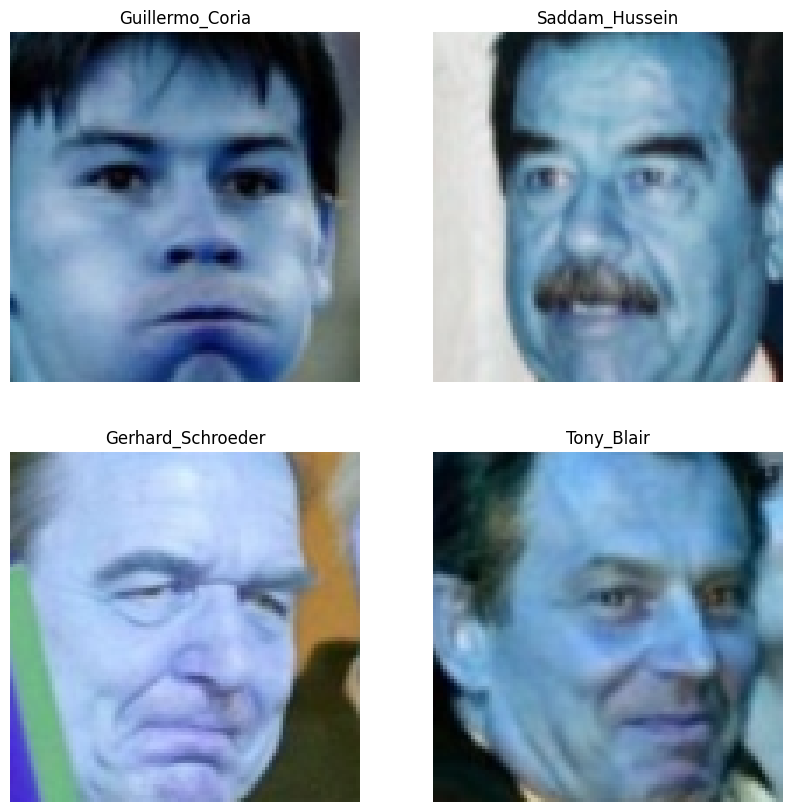

In [289]:
# Face detection 
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

def detect_faces(images, labels):
    detected_faces = []
    updated_labels = []  # To store labels corresponding to detected faces
    label_counts = defaultdict(int)  # Dictionary to store the count of samples for each label

    for image, label in zip(images, labels):
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB if needed
        gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)  # Convert to grayscale

        # Detect faces
        faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.2, minNeighbors=5)

        if len(faces) == 1:
            (x, y, w, h) = faces[0]
            # Crop and resize the face to a fixed size (e.g., 100x100)
            face = cv2.resize(image[y:y+h, x:x+w], (100, 100))
            detected_faces.append(face)
            updated_labels.append(label)  # Append label for the detected face
            label_counts[label] += 1  # Increment the count for this label

    return np.array(detected_faces), np.array(updated_labels)


face_detect, updated_labels = detect_faces(dataset['data'], dataset['target'])
display_random_images(face_detect, updated_labels, 2, 2, cmap='gray')


In [290]:
face_detect[0]

array([[[ 51,  56,  73],
        [ 45,  49,  67],
        [ 40,  45,  63],
        ...,
        [ 42,  47,  62],
        [ 47,  52,  68],
        [ 54,  59,  74]],

       [[ 52,  56,  74],
        [ 46,  50,  68],
        [ 41,  46,  64],
        ...,
        [ 41,  48,  63],
        [ 45,  52,  67],
        [ 53,  60,  75]],

       [[ 51,  55,  73],
        [ 45,  50,  68],
        [ 41,  47,  64],
        ...,
        [ 41,  49,  64],
        [ 43,  51,  65],
        [ 49,  57,  72]],

       ...,

       [[108, 131, 153],
        [109, 134, 158],
        [122, 149, 173],
        ...,
        [ 24,  37,  65],
        [ 22,  37,  65],
        [ 17,  34,  62]],

       [[110, 133, 155],
        [111, 135, 159],
        [122, 149, 173],
        ...,
        [ 29,  43,  70],
        [ 25,  41,  68],
        [ 18,  37,  63]],

       [[110, 133, 155],
        [111, 136, 159],
        [122, 148, 172],
        ...,
        [ 33,  49,  75],
        [ 29,  48,  74],
        [ 22,  44,  69]]

In [291]:
updated_labels.shape

(2805,)

In [292]:
face_detect.shape

(2805, 100, 100, 3)

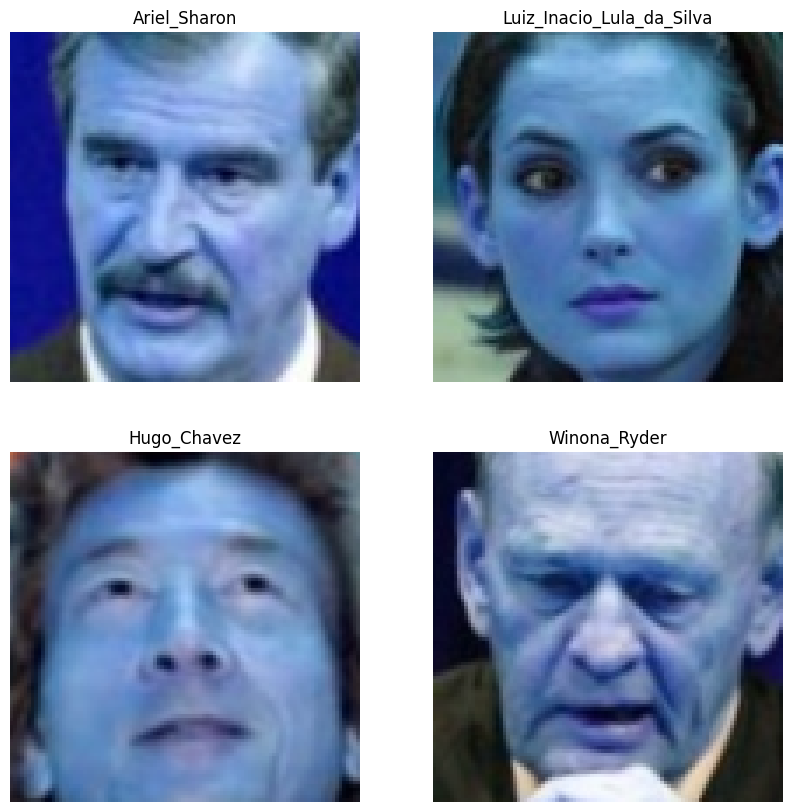

In [293]:
def resize(images, target_size=(100, 100)):
    resize_image = [cv2.resize(image, target_size) for image in images]
    return np.array(resize_image)

resized_image = resize(face_detect, target_size=(100, 100))
display_random_images(resized_image, dataset['target'], 2, 2)

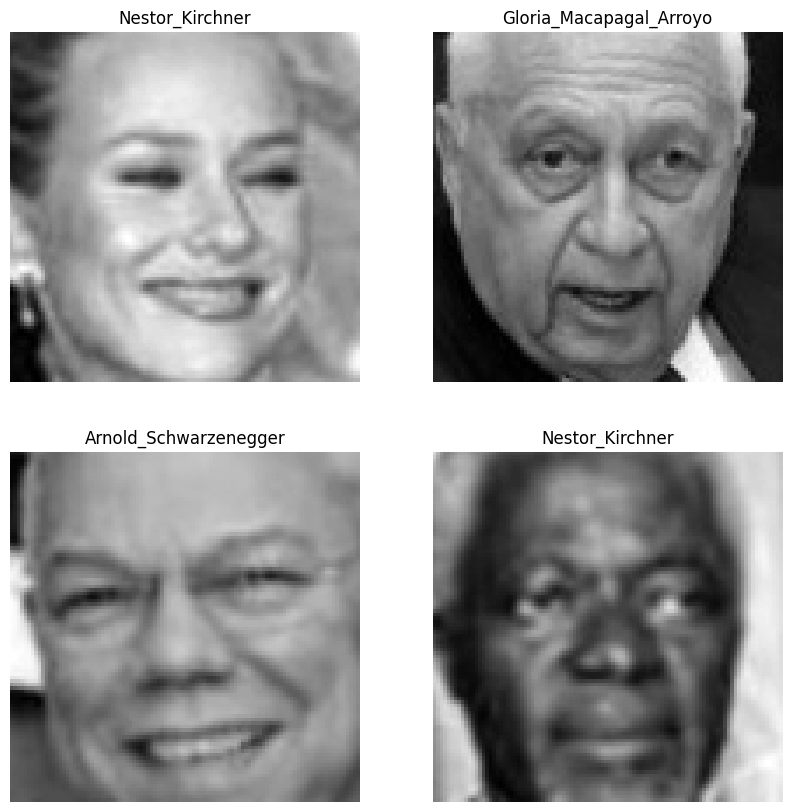

In [294]:
def gray_scale(images):
    gray_images = [cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) for image in images]
    return np.array(gray_images)
gray_images = gray_scale(resized_image)
display_random_images(gray_images, dataset['target'], 2, 2, cmap='gray')

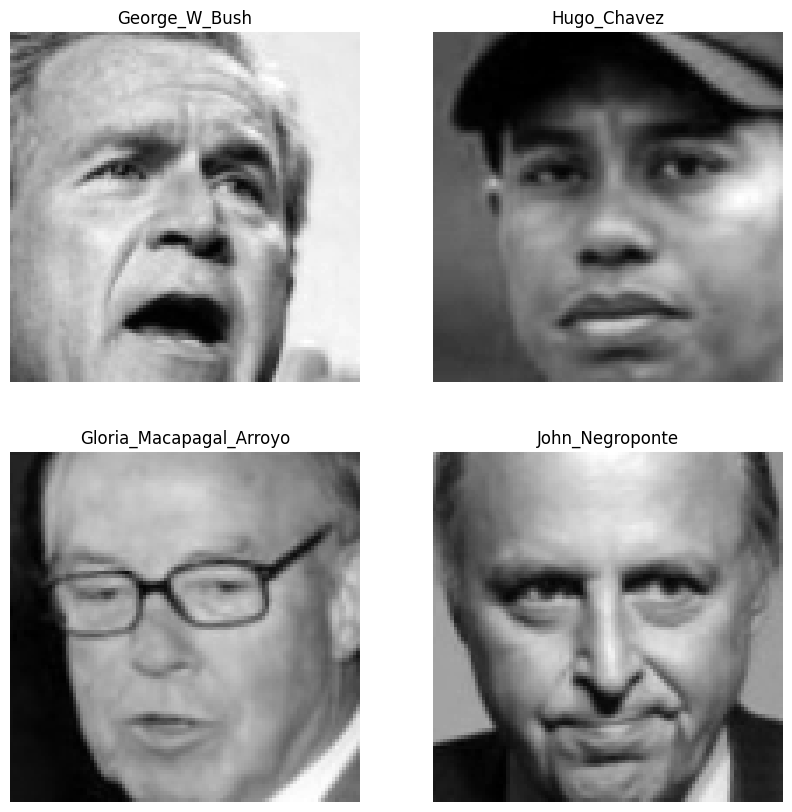

In [295]:
def standard_scaler(images):
    scaler = StandardScaler()
    scaled_face = [scaler.fit_transform(image.reshape(-1, 1)).reshape(image.shape) for image in images]

    return np.array(scaled_face)

standard_scaler_image = standard_scaler(gray_images)
display_random_images(standard_scaler_image, dataset['target'], 2, 2, cmap='gray')

In [296]:
len(np.unique(updated_labels))

62

## Split data

In [297]:
X= standard_scaler_image
y= updated_labels

In [298]:
y.shape

(2805,)

In [299]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [300]:
y_train.shape

(2244,)

## Data Augmentation

In [301]:
# max_samples = 100

# # Identify labels with more than 100 samples
# labels_above_max_samples = [
#     label for label in np.unique(y_train) if np.sum(y_train == label) > max_samples
# ]

# # Initialize X_train_reduced and y_train_reduced
# X_train_reduced = np.empty((0,) + X_train.shape[1:], dtype=X_train.dtype)
# y_train_reduced = np.empty(0, dtype=y_train.dtype)

# # Loop through all labels
# for label in np.unique(y_train):
#     indices = np.where(y_train == label)[0]

#     # If the label count is greater than max_samples, shuffle and select max_samples
#     if len(indices) > max_samples:
#         indices = shuffle(indices)[:max_samples]

#     # Append the data and labels to X_train_reduced and y_train_reduced
#     X_train_reduced = np.append(X_train_reduced, X_train[indices], axis=0)
#     y_train_reduced = np.append(y_train_reduced, y_train[indices])

# X_train_reduced, y_train_reduced = shuffle(X_train_reduced, y_train_reduced, random_state=42)

In [302]:
# unique_labels, label_counts = np.unique(y_train_reduced, return_counts=True)

# # for label, count in zip(unique_labels, label_counts):
# #     print(f"Label: {label}, Count: {count}")
# plt.figure(figsize=(10, 6))
# plt.bar(unique_labels, label_counts, color='blue')
# plt.xlabel('Label')
# plt.ylabel('Count')
# plt.title('Histogram of Label Counts')
# plt.show()

In [303]:
# X_train_reduced.shape

In [304]:
# def perform_augmentation(X_train, y_train, target_count=100):
#     # Convert X_train to uint8
#     X_train = (X_train * 255).astype(np.uint8)

#     # Define the transformations
#     transform = A.Compose([
#         A.RandomCrop(width=64, height=64),
#         A.HorizontalFlip(p=0.5),
#         A.ShiftScaleRotate(p=0.5, shift_limit=0.1, scale_limit=0.2, rotate_limit=15),
#         A.RandomBrightnessContrast(p=0.2),
#         A.Blur(blur_limit=3, p=0.2)
#     ])

#     # Initialize X_train_aug and y_train_aug
#     X_train_aug = X_train.copy()
#     y_train_aug = y_train.copy()

#     # Loop through unique labels in y_train
#     for label in np.unique(y_train):
#         # If the label count is less than target_count, augment the data
#         if np.sum(y_train == label) < target_count:
#             indices = np.where(y_train == label)[0]
#             num_augmentations = min(target_count - np.sum(y_train_aug == label), len(indices))

#             if num_augmentations > 0:
#                 augmented_data = [
#                     A.Resize(X_train.shape[1], X_train.shape[2])(image=x)['image']
#                     for x in [transform(image=x)['image'] for x in X_train[indices[:num_augmentations]]]
#                 ]

#                 augmented_data_resized = np.stack(augmented_data)
#                 augmented_labels = np.full((num_augmentations,), label)

#                 # Append the augmented data and labels to X_train_aug and y_train_aug
#                 X_train_aug = np.append(X_train_aug, augmented_data_resized, axis=0)
#                 y_train_aug = np.append(y_train_aug, augmented_labels, axis=0)

#     # Shuffle the augmented data
#     X_train_aug, y_train_aug = shuffle(X_train_aug, y_train_aug, random_state=42)

#     return X_train_aug, y_train_aug


In [305]:
# X_train_aug, y_train_aug = perform_augmentation(X_train_reduced, y_train_reduced)

In [306]:
# X_train_aug.shape

In [307]:
# unique_labels, label_counts = np.unique(y_train_aug, return_counts=True)

# # for label, count in zip(unique_labels, label_counts):
#     #print(f"Label: {label}, Count: {count}")
# plt.figure(figsize=(10, 6))
# plt.bar(unique_labels, label_counts, color='blue')
# plt.xlabel('Label')
# plt.ylabel('Count')
# plt.title('Histogram of Label Counts')
# plt.show()

## Feature Extraction

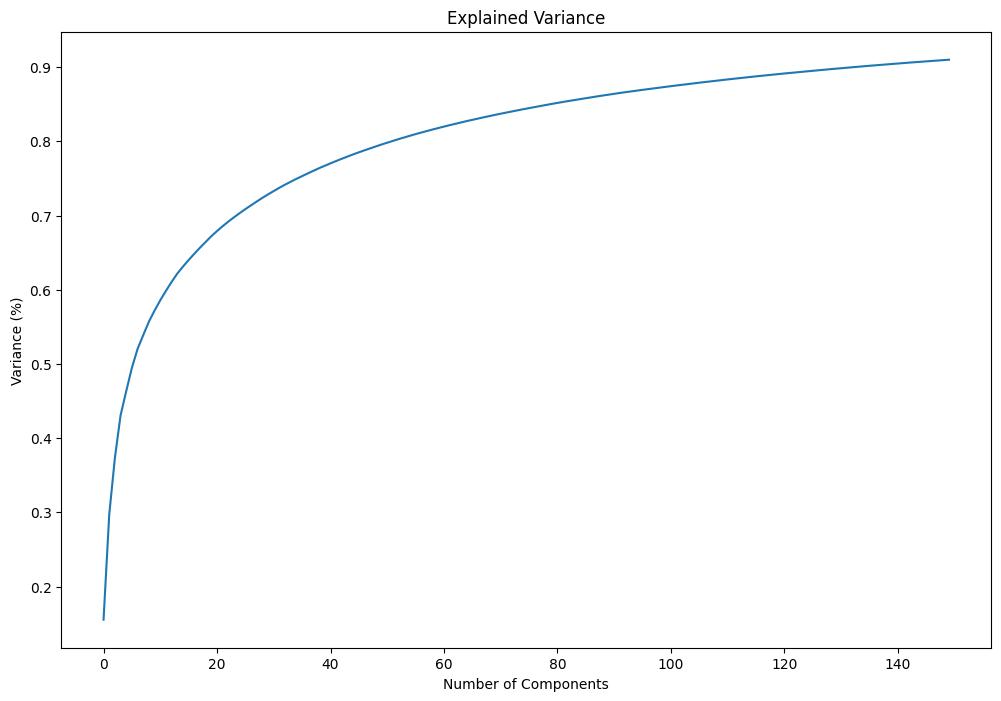

In [312]:
# Reshape the training data
x_train = X_train.reshape(-1, 100 * 100)

# Reshape the testing data
x_test = X_test.reshape(-1, 100 * 100)

# Apply PCA
pca = PCA(n_components=150, whiten=True, random_state=42)
X_train_pca = pca.fit_transform(x_train)
X_test_pca = pca.transform(x_test)

# Plot the explained variance ratio
plt.figure(figsize=(12, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.show()

In [317]:
# Create an SVM classifier
clf = svm.SVC(kernel="rbf", class_weight="balanced")

# Perform 10-fold cross-validation
scores = cross_val_score(clf, X_train_pca, y_train, cv=10)

# Print cross-validation scores
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}%".format(scores.mean() * 100))

# Train the model
clf.fit(X_train_pca, y_train)

Cross-validation scores: [0.57777778 0.58222222 0.58666667 0.58666667 0.62053571 0.57142857
 0.59375    0.58482143 0.62946429 0.57142857]
Average cross-validation score: 59.05%


SVC(class_weight='balanced')

In [318]:
y_pred = clf.predict(X_test_pca)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy Score: {:.2f}%".format(accuracy * 100))

Accuracy Score: 61.32%


<Axes: >

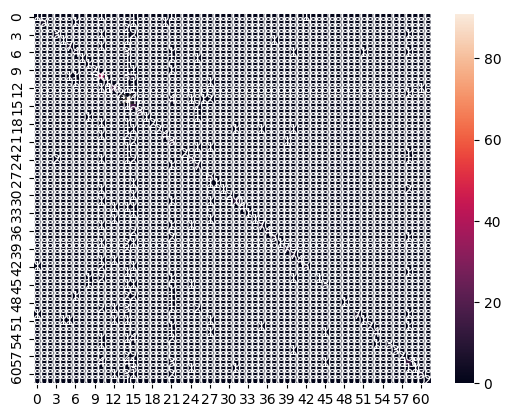

In [329]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)

In [324]:
print(metrics.classification_report(y_test, y_pred))

                           precision    recall  f1-score   support

         Alejandro_Toledo       0.33      0.20      0.25         5
             Alvaro_Uribe       1.00      0.62      0.77         8
          Amelie_Mauresmo       0.00      0.00      0.00         2
             Andre_Agassi       0.60      0.38      0.46         8
           Angelina_Jolie       0.50      0.33      0.40         3
             Ariel_Sharon       0.78      0.88      0.82         8
    Arnold_Schwarzenegger       0.50      0.36      0.42        11
     Atal_Bihari_Vajpayee       1.00      0.25      0.40         4
             Bill_Clinton       0.25      0.50      0.33         2
             Carlos_Menem       1.00      0.40      0.57         5
             Colin_Powell       0.60      0.78      0.68        46
            David_Beckham       1.00      0.20      0.33         5
          Donald_Rumsfeld       0.73      0.80      0.76        20
         George_Robertson       1.00      0.25      0.40     

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn

In [333]:
test_image = cv2.imread('./Data/Gloria_Macapagal_Arroyo/Gloria_Macapagal_Arroyo_0013.jpg')

test_image = resize([test_image], target_size=(100, 100))[0]

test_image = gray_scale([test_image])[0]

# Scale the image
test_image = StandardScaler().fit_transform(test_image.reshape(-1, 1)).reshape(test_image.shape)

# Reduce the dimensions
test_image = pca.transform(test_image)

# Make a prediction

pred = clf.predict(test_image)[0]

print("Prediction:", pred)

error: OpenCV(4.8.1) :-1: error: (-5:Bad argument) in function 'resize'
> Overload resolution failed:
>  - Can't parse 'dsize'. Expected sequence length 2, got 3
>  - Can't parse 'dsize'. Expected sequence length 2, got 3


## Previous Task

In [ ]:
# face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# def detect_and_preprocess(dataset, target_size=(100, 100)):
#     preprocessed_faces = []

#     for img in dataset:  # Iterate over the images in the dataset
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB if needed
#         gray_image = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)  # Convert to grayscale
#         # Detect faces
#         faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.2, minNeighbors=5)

#         for (x, y, w, h) in faces:
#             # Crop the face
#             face = img[y:y+h, x:x+w]

#             # 1. Resize the face image using OpenCV
#             resized_face = cv2.resize(face, target_size)

#             # 3. Standard Scaling
#             scaler = StandardScaler()
#             scaled_face = scaler.fit_transform(resized_face.reshape(-1, 1)).reshape(resized_face.shape)

#             # 2. Convert grayscale
#             gray_scaled_face = cv2.cvtColor(scaled_face, cv2.COLOR_RGB2GRAY)
#             preprocessed_faces.append(gray_scaled_face)

#     return np.array(preprocessed_faces)

In [ ]:
# image = detect_and_preprocess(dataset['data'])

In [ ]:
# image[0]

In [ ]:
# #Plot image
# img = image[0]
# img = img.reshape(100, 100)

# plt.imshow(img, cmap='gray')
# plt.axis('off')
# plt.show()

In [ ]:
# def filter_dataset(dataset, min_faces_per_person):
#     # Count the number of images for each person
#     target_counts = Counter(dataset['target'])
#     # Initialize the filtered dataset
#     filtered_dataset = {
#     'data': [],
#     'target': [],
#     'target_names': set()
#     }
#     # For each image and its corresponding label
#     for image, label in zip(dataset['data'], dataset['target']):
#         # If this person has at least min_faces_per_person images
#         if target_counts[label] >= min_faces_per_person:
#             # Add this image and label to the filtered dataset
#             filtered_dataset['data'].append(image)
#             filtered_dataset['target'].append(label)
#             filtered_dataset['target_names'].add(label)
#     filtered_dataset['data'] = np.array(filtered_dataset['data'])
#     filtered_dataset['target'] = np.array(filtered_dataset['target'])
#     filtered_dataset['target_names'] = np.array(list(filtered_dataset['target_names']))
#     return filtered_dataset

# dataset['data'] = image
# filtered_dataset = filter_dataset(dataset, min_faces_per_person=5)
# display_random_images(filtered_dataset['data'], filtered_dataset['target'], 3, 3, cmap='gray')

In [ ]:
# filtered_dataset['data'].shape

In [ ]:
# dataset['data'].shape

In [ ]:
# dataset['data'][0]

In [ ]:
# # Reshape the training data
# x_train = X_train.reshape(-1, 100 * 100)

# # Reshape the testing data
# x_test = X_test.reshape(-1, 100 * 100)

# # Apply PCA
# pca = PCA(n_components=150, whiten=True, random_state=42)
# X_train_pca = pca.fit_transform(x_train)
# X_test_pca = pca.transform(x_test)

# # Plot the explained variance ratio
# plt.figure(figsize=(12, 8))
# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.xlabel('Number of Components')
# plt.ylabel('Variance (%)')
# plt.title('Explained Variance')
# plt.show()

In [ ]:
# x_test.shape

# Train Model

In [ ]:
# # Create an SVM classifier
# clf = svm.SVC(kernel="rbf", class_weight="balanced")

# # # Perform 10-fold cross-validation
# # scores = cross_val_score(clf, X_train_pca, y_train, cv=10)

# # # Print cross-validation scores
# # print("Cross-validation scores: {}".format(scores))
# # print("Average cross-validation score: {:.2f}%".format(scores.mean() * 100))

# # Train the model
# clf.fit(X_train_pca, y_train)

In [ ]:
# y_pred = clf.predict(X_test_pca)

# # Calculate accuracy score
# accuracy = accuracy_score(y_test, y_pred)

# # Print the accuracy score
# print("Accuracy Score: {:.2f}%".format(accuracy * 100))

In [ ]:
# print(classification_report(y_test, y_pred))

In [ ]:
# Logistic Regression
# Check why our model has low accuracy
